[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 7.48

Analysis of user ratings for the movies Independence Day and Mission Impossible\
Topics: Sample conditional mean, conditional expectation

Author: Carlos Fernandez-Granda\
Data source: https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

font_size = 15
font_size_ticks = 15

rating_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', encoding='latin-1',names=rating_names)
movie_names = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=movie_names,usecols=range(3),
                     encoding='latin-1')
data = pd.merge(movies,ratings)

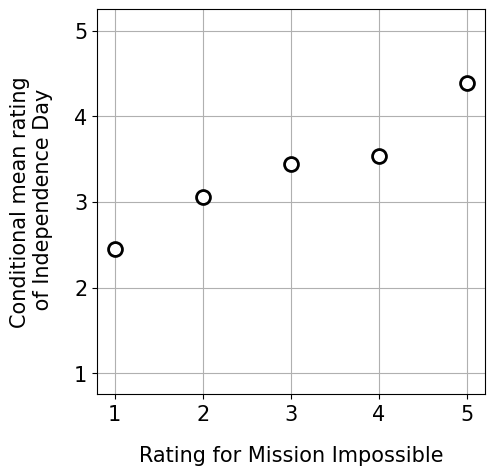

In [3]:
def conditional_mean_function(movie,movie_cond,verbose):
    ratings = data[data["title"] == movie]
    ratings_cond = data[data["title"] == movie_cond]
    if verbose:
        print(ratings[:2])
        print(ratings_cond[:2])

    total_sum = np.zeros(5)
    normalization = np.zeros(5)

    for index, row in ratings_cond.iterrows():
        user_id = row['user_id']
        aux = ratings[ratings["user_id"] == user_id]
        if len(aux)==0:
            if verbose:
                print("no match")
        elif len(aux)>1:
            if verbose:
                print("more than one match")
        else:
            rating_cond = row['rating']
            rating = aux['rating'].values[0]
            if verbose:
                print("rating_cond: " + str(rating_cond) + " rating: " + str(rating))
            total_sum[rating_cond-1] += rating
            normalization[rating_cond-1] += 1
    conditional_mean = np.divide(total_sum,normalization)
    
    if verbose:
        print(total_sum)
        print(normalization)
    
    return conditional_mean

verbose = False
movie_1 = 'Mission: Impossible (1996)'
movie_2 = 'Independence Day (ID4) (1996)'
conditional_mean = conditional_mean_function(movie_2,movie_1,verbose)
np.set_printoptions(precision=2)
# print("Conditional mean function of " + movie_2 + ' given ' + movie_1)
# print(conditional_mean)

plt.figure(figsize=(5,5))
rating_vals = np.arange(1, 5+1, 1)
plt.plot(rating_vals,conditional_mean,"o",ms=10,markeredgecolor="black",markerfacecolor="white",mew=2)
plt.grid()
plt.xticks(rating_vals,fontsize=font_size_ticks) 
plt.yticks(rating_vals,fontsize=font_size_ticks)
plt.ylim([0.75,5.25])
plt.ylabel("Conditional mean rating\n of Independence Day",fontsize=font_size,labelpad = 15)
plt.xlabel("Rating for Mission Impossible",fontsize=font_size,labelpad = 15);